In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
from pathlib import Path
import sys
import time
import torch
from torch.utils.data import DataLoader
from torchvision import transforms as T
from glob import glob

import matplotlib.pyplot as plt
from tqdm import tqdm

from batch_dataloader import BatchReadXPlaneVideoDataset, BatchReadXPlaneDataLoader
from random_access_dataloader import RandomAccessXPlaneVideoDataset
from utils import process_videos

In [3]:
def custom_collate_fn(batch):
    #t = time.time()
    frames, states = tuple(map(list, zip(*batch)))
    #frames = [frame.clone() for frame in frames]
    ret = torch.stack(frames), torch.tensor(states).to(torch.float32)
    #t = time.time() - t
    #print(f"Collation took {t:.4e} s")
    return ret


In [4]:
files = [Path(f) for f in glob(str(Path("~/datasets/xplane_recording4/*.avi").expanduser()))]
process_videos(files)
files = [f.with_suffix(".mp4") for f in files]

100%|██████████| 87/87 [02:08<00:00,  1.48s/it]


In [5]:
ds = RandomAccessXPlaneVideoDataset(files, transform=None)

In [6]:
dl = DataLoader(ds, batch_size=32, shuffle=True, num_workers=16, collate_fn=custom_collate_fn)

In [7]:
for row in tqdm(dl, total=len(dl)):
    pass

  0%|          | 0/627 [00:00<?, ?it/s]

100%|██████████| 627/627 [01:08<00:00,  9.13it/s]


In [7]:
for row in tqdm(dl, total=len(dl)):
    pass

  0%|          | 0/627 [00:00<?, ?it/s]

100%|██████████| 627/627 [01:27<00:00,  7.13it/s]


In [9]:
for row in tqdm(dl, total=len(dl)):
    pass

100%|██████████| 627/627 [01:10<00:00,  8.90it/s]


In [6]:
len(ds)

20042

In [ ]:
dl = BatchReadXPlaneDataLoader(BatchReadXPlaneVideoDataset(files), batch_size=16)

In [7]:
transform = T.Compose(
    [
        T.Lambda(lambda x: torch.as_tensor(x).cuda()),
        T.Lambda(lambda x: x.transpose(-3, -1)),
        T.RandomRotation(10),
        T.ColorJitter(1.0, 1.0, 1.0, 0.5),
        T.Resize((224, 224)),
    ]
)

def transform_fn(X):
    t =time.time()
    X = transform(X)
    t = time.time() - t
    print(f"Transform time: {t:.4e} s")
    return X

ds = BatchReadXPlaneVideoDataset(
    files,
    transform=transform_fn,
    skip_start_frames=120,
    skip_end_frames=60,
    frame_skip_n=10,
    video_batch_size=20,
)

# ds = ChunkXPlaneVideoDataset(
#    files,
#    transform=T.Compose(
#        [T.Lambda(lambda x: x.permute(2, 0, 1)), T.Resize((360, 480))]
#    ),
# )
# ds = RAMXPlaneVideoDataset(Path("/mnt/Storage2/subset.bin"), transform=None)

# dl = DataLoader(
#    ds,
#    batch_size=config["batch_size"],
#    num_workers=0,
#    shuffle=False,
#    collate_fn=custom_collate_fn,
# )
dl = BatchReadXPlaneDataLoader(
    ds,
    batch_size=16,
    num_workers=0,
    shuffle=False,
    collate_fn=custom_collate_fn,
)

Setting custom collate_fn


In [8]:
t = time.time()
for row in dl:
    print(f"Sampling took {time.time() - t:.4e} seconds")
    t = time.time()

Reading in batch took 3.0682e+01 seconds
Transform time: 1.6342e-01 s
Transform time: 2.6026e-03 s
Transform time: 3.6848e-03 s
Transform time: 4.8094e-03 s
Transform time: 3.8886e-03 s
Transform time: 3.8977e-03 s
Transform time: 3.9387e-03 s
Transform time: 4.9193e-03 s
Transform time: 4.3826e-03 s
Transform time: 3.9146e-03 s


/home/rdyro/.pyenv/versions/devel/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Transform time: 3.9406e-03 s
Transform time: 5.0464e-03 s
Transform time: 4.4260e-03 s
Transform time: 4.2441e-03 s
Transform time: 3.8612e-03 s
Transform time: 5.0805e-03 s
Collation took 1.4138e-04 s
Sampling took 3.1088e+01 seconds
Transform time: 4.2775e-03 s
Transform time: 4.0030e-03 s
Transform time: 3.9289e-03 s
Transform time: 4.8337e-03 s
Transform time: 4.6480e-03 s
Transform time: 4.1995e-03 s
Transform time: 5.4905e-03 s
Transform time: 4.5762e-03 s
Transform time: 4.2603e-03 s
Transform time: 3.9406e-03 s
Transform time: 4.7328e-03 s
Transform time: 4.4820e-03 s
Transform time: 5.9249e-03 s
Transform time: 4.6029e-03 s
Transform time: 3.8829e-03 s
Transform time: 4.5931e-03 s
Collation took 5.7936e-05 s
Sampling took 7.2932e-02 seconds
Transform time: 4.2408e-03 s
Transform time: 5.1696e-03 s
Transform time: 3.9132e-03 s
Transform time: 3.9279e-03 s
Transform time: 3.9215e-03 s
Transform time: 5.1229e-03 s
Transform time: 4.0379e-03 s
Transform time: 5.0492e-03 s
Transfor

KeyboardInterrupt: 

In [5]:
for (i, row) in enumerate(tqdm(dl, total=len(dl))):
    pass
#for i in tqdm(range(len(dl.ds))):
#    row = dl.ds[i]

  0%|          | 0/2005 [00:00<?, ?it/s]

  0%|          | 1/2005 [00:16<9:08:17, 16.42s/it]

Reading in batch took 1.6276e+01 seconds
Incrementing


 12%|█▏        | 231/2005 [00:32<03:28,  8.49it/s]

Reading in batch took 1.5363e+01 seconds


 20%|██        | 409/2005 [00:32<01:29, 17.75it/s]

Incrementing
Reading in batch took 1.4242e+01 seconds


 29%|██▉       | 587/2005 [00:46<01:35, 14.85it/s]

Incrementing


 35%|███▍      | 696/2005 [01:02<01:55, 11.29it/s]

Reading in batch took 1.5551e+01 seconds


 35%|███▍      | 697/2005 [01:02<01:56, 11.27it/s]

Incrementing


 46%|████▌     | 919/2005 [01:18<01:26, 12.58it/s]

Reading in batch took 1.5585e+01 seconds


 46%|████▌     | 921/2005 [01:18<01:26, 12.59it/s]

Incrementing


 58%|█████▊    | 1156/2005 [01:32<00:58, 14.53it/s]

Reading in batch took 1.3799e+01 seconds


 58%|█████▊    | 1158/2005 [01:32<00:58, 14.49it/s]

Incrementing


 69%|██████▊   | 1376/2005 [01:47<00:43, 14.63it/s]

Reading in batch took 1.4530e+01 seconds


 69%|██████▊   | 1378/2005 [01:47<00:42, 14.62it/s]

Incrementing


 80%|████████  | 1611/2005 [02:02<00:25, 15.24it/s]

Reading in batch took 1.4458e+01 seconds


 80%|████████  | 1613/2005 [02:02<00:25, 15.20it/s]

Incrementing


 92%|█████████▏| 1842/2005 [02:13<00:09, 17.61it/s]

Reading in batch took 1.0687e+01 seconds


100%|██████████| 2005/2005 [02:13<00:00, 14.97it/s]

Incrementing


In [6]:
for (i, row) in enumerate(tqdm(dl, total=len(dl))):
    pass

  0%|          | 0/2005 [00:00<?, ?it/s]

  0%|          | 1/2005 [00:14<8:06:42, 14.57s/it]

Reading in batch took 1.4355e+01 seconds
Incrementing


 11%|█▏        | 230/2005 [00:29<03:13,  9.18it/s]

Reading in batch took 1.4512e+01 seconds


 21%|██▏       | 428/2005 [00:29<01:17, 20.38it/s]

Incrementing


 31%|███       | 626/2005 [00:44<01:22, 16.62it/s]

Reading in batch took 1.4359e+01 seconds
Incrementing


 31%|███       | 626/2005 [00:55<01:22, 16.62it/s]

Reading in batch took 1.6799e+01 seconds


 34%|███▍      | 682/2005 [01:01<02:08, 10.27it/s]

Incrementing


 46%|████▌     | 926/2005 [01:16<01:26, 12.44it/s]

Reading in batch took 1.4813e+01 seconds
Incrementing


 58%|█████▊    | 1160/2005 [01:31<01:02, 13.43it/s]

Reading in batch took 1.5013e+01 seconds


 58%|█████▊    | 1162/2005 [01:31<01:02, 13.45it/s]

Incrementing


 70%|██████▉   | 1400/2005 [01:46<00:40, 14.81it/s]

Reading in batch took 1.3712e+01 seconds
Incrementing


 86%|████████▌ | 1716/2005 [02:00<00:17, 16.28it/s]

Reading in batch took 1.3892e+01 seconds
Incrementing


 92%|█████████▏| 1841/2005 [02:10<00:10, 14.93it/s]

Reading in batch took 9.7653e+00 seconds
Incrementing


100%|██████████| 2005/2005 [02:10<00:00, 15.35it/s]


In [7]:
out = dl[0]

Reading in batch took 1.5033e+01 seconds


In [5]:
img1, img2, img3 = dl[0], dl[1], dl[2]
img1, img2, img3 = img1[0], img2[0], img3[0]

Reading in batch took 1.3284e+01 seconds


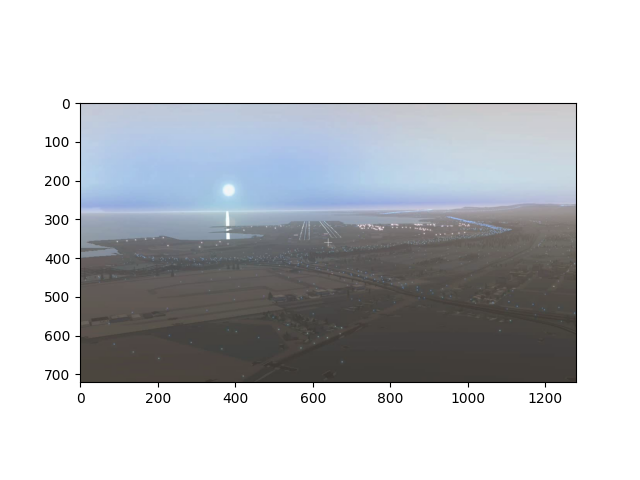

In [6]:
plt.figure()
plt.imshow(img1)
plt.show()

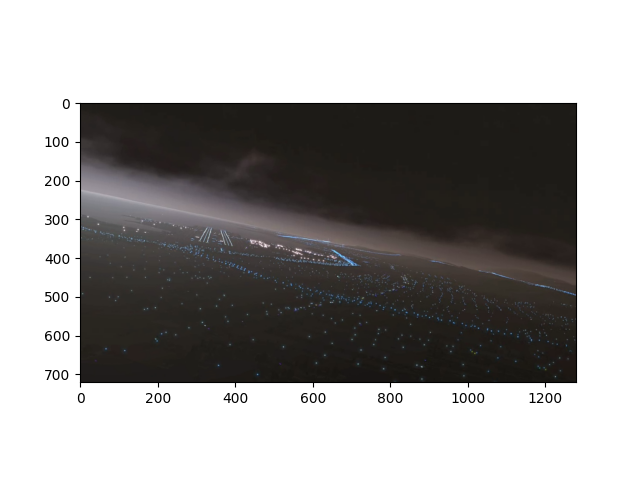

In [7]:
plt.figure()
plt.imshow(img2)
plt.show()

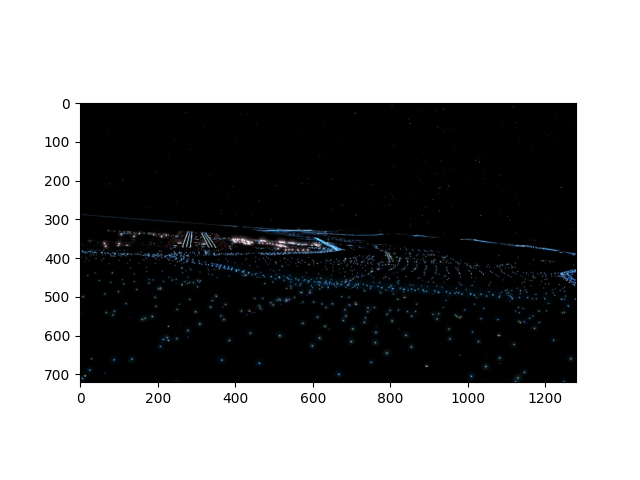

In [8]:
plt.figure()
plt.imshow(img3)
plt.show()

In [9]:
for row in dl:
    pass

Reading in batch took 1.3257e+01 seconds
Incrementing
Reading in batch took 1.4848e+01 seconds
Incrementing
Reading in batch took 1.5543e+01 seconds
Incrementing
Reading in batch took 1.4740e+01 seconds
Incrementing
Reading in batch took 1.3351e+01 seconds
Incrementing
Reading in batch took 1.4360e+01 seconds
Incrementing
Reading in batch took 1.4267e+01 seconds
Incrementing
Reading in batch took 1.4845e+01 seconds
Incrementing
Reading in batch took 9.7249e+00 seconds
Incrementing
